In [1]:
import pickle
import pandas as pd
import warnings
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy import optimize
import pickle
import statsmodels.api as sm
from scipy import stats

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [20]:
#Number of sensors
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
num_sensors = np.zeros((12,3))
flows = np.zeros((12,3))

count =0
x = set(list(flow2020.keys()))
for month in months:
    file_name = f'monthly_data/unfiltered_sensor_monthly_2020_{month}.pkl'
    with open(file_name, 'rb') as file:
        flow2020 = pickle.load(file)
    x= x.intersection(set(list(flow2020.keys())))
    num_sensors[count,0] = len(flow2020)
    flows[count,0] = np.mean([np.mean(flow2020[i]) for i in flow2020])
    if month != '02':
        file_name = f'monthly_data/unfiltered_sensor_monthly_2021_{month}.pkl'
        with open(file_name, 'rb') as file:
            flow2021 = pickle.load(file)
        num_sensors[count,1] = len(flow2021)
        flows[count,1] = np.mean([np.mean(flow2021[i]) for i in flow2021])
        x= x.intersection(set(list(flow2021.keys())))
    file_name = f'monthly_data/unfiltered_sensor_monthly_2022_{month}.pkl'
    with open(file_name, 'rb') as file:
        flow2022 = pickle.load(file)
    x= x.intersection(set(list(flow2022.keys())))
    num_sensors[count,2] = len(flow2022)
    flows[count,2] = np.mean([np.mean(flow2022[i]) for i in flow2022])
    count += 1

ValueError: setting an array element with a sequence.

In [17]:
num_sensors

array([[18524., 12136., 12200.],
       [15230.,     0., 12111.],
       [18527., 12141., 12111.],
       [18523., 12145., 12094.],
       [15186., 12155., 12093.],
       [18373., 12164., 12091.],
       [15164., 12166., 12094.],
       [15161., 12170., 12099.],
       [15175., 12181., 12083.],
       [18607., 12193., 12097.],
       [18622., 12201., 12107.],
       [18630., 12200., 12113.]])

In [18]:
len(x)

11593

In [19]:
flows

array([[ 81.59762086, 112.84864985,   1.34303242],
       [ 95.80181789,   0.        ,   1.34324168],
       [ 92.26884349,   1.34990367,   1.34340425],
       [ 86.64742579,   1.35002058,  77.59475602],
       [ 60.00375985,   1.34907402, 130.55466892],
       [ 44.81139446,   1.34791153, 142.02694429],
       [  1.11816679,   1.34763354, 135.63945041],
       [  1.14672351,   1.34683637, 122.78158625],
       [  1.18760954,   1.34696772, 119.48873743],
       [ 83.09164152,   1.34492406, 164.69724316],
       [ 80.7672471 ,   1.34401908, 164.51944121],
       [ 74.18339626,   1.34312722, 143.29691524]])

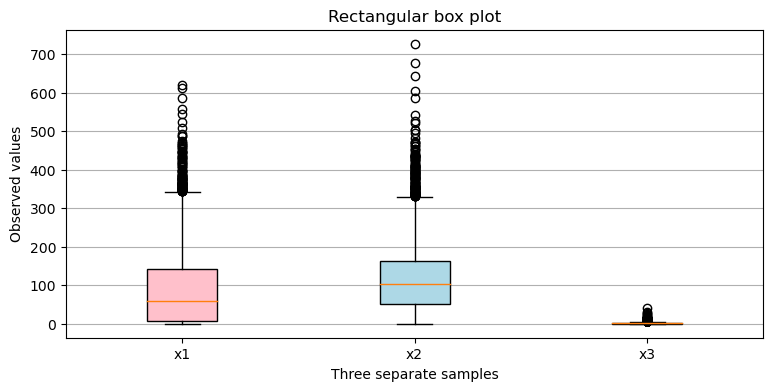

In [33]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['2020', '2021', '2022']
data = [np.array([np.mean(flow2020[i]) for i in flow2020]),[np.mean(flow2021[i]) for i in flow2021],[np.mean(flow2022[i]) for i in flow2022]]

fig,ax1 = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Rectangular box plot')


# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines
ax1.yaxis.grid(True)
ax1.set_xlabel('Three separate samples')
ax1.set_ylabel('Observed values')

plt.show()

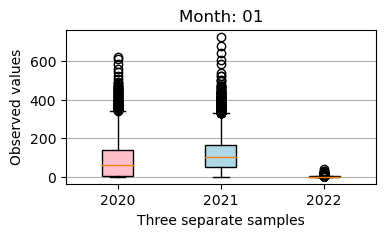

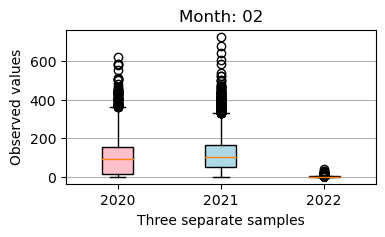

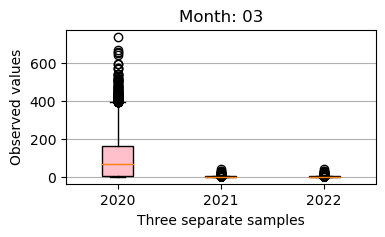

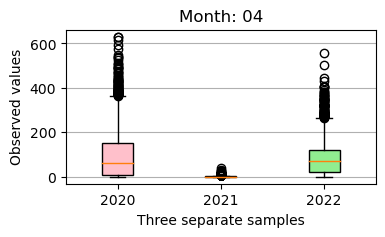

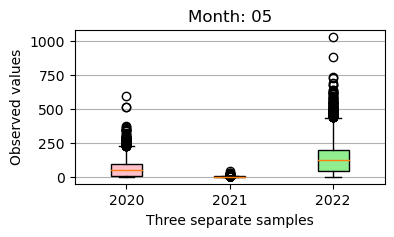

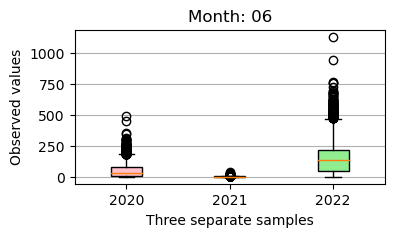

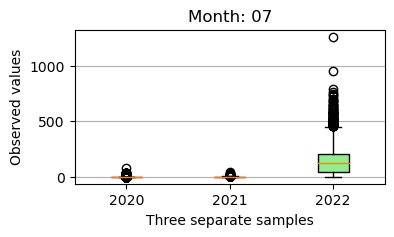

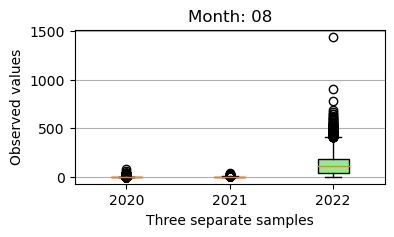

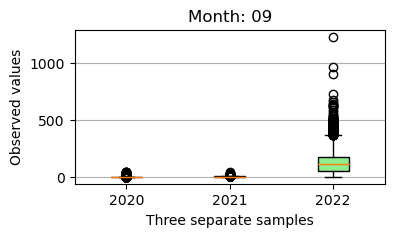

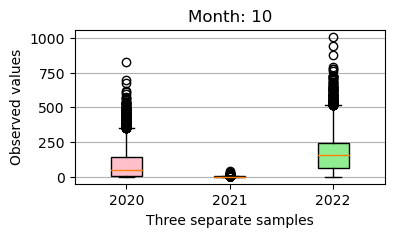

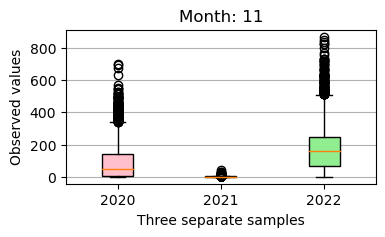

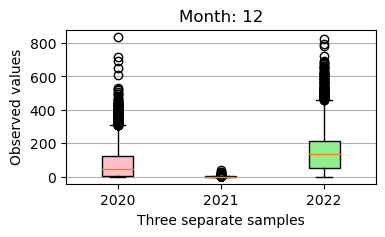

In [37]:
#Number of sensors
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
num_sensors = np.zeros((12,3))
flows = np.zeros((12,3))

count =0
x = set(list(flow2020.keys()))
for month in months:
    file_name = f'monthly_data/unfiltered_sensor_monthly_2020_{month}.pkl'
    with open(file_name, 'rb') as file:
        flow2020 = pickle.load(file)
    x= x.intersection(set(list(flow2020.keys())))
    num_sensors[count,0] = len(flow2020)
    flows[count,0] = np.mean([np.mean(flow2020[i]) for i in flow2020])
    if month != '02':
        file_name = f'monthly_data/unfiltered_sensor_monthly_2021_{month}.pkl'
        with open(file_name, 'rb') as file:
            flow2021 = pickle.load(file)
        num_sensors[count,1] = len(flow2021)
        flows[count,1] = np.mean([np.mean(flow2021[i]) for i in flow2021])
        x= x.intersection(set(list(flow2021.keys())))
    file_name = f'monthly_data/unfiltered_sensor_monthly_2022_{month}.pkl'
    with open(file_name, 'rb') as file:
        flow2022 = pickle.load(file)
    x= x.intersection(set(list(flow2022.keys())))
    num_sensors[count,2] = len(flow2022)
    flows[count,2] = np.mean([np.mean(flow2022[i]) for i in flow2022])
    count += 1
    labels = ['2020', '2021', '2022']
    data = [np.array([np.mean(flow2020[i]) for i in flow2020]),[np.mean(flow2021[i]) for i in flow2021],[np.mean(flow2022[i]) for i in flow2022]]

    fig,ax1 = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))

    # rectangular box plot
    bplot1 = ax1.boxplot(data,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
    ax1.set_title('Month: '+str(month))


    # fill with colors
    colors = ['pink', 'lightblue', 'lightgreen']
    for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)

    # adding horizontal grid lines
    ax1.yaxis.grid(True)
    ax1.set_xlabel('Three separate samples')
    ax1.set_ylabel('Observed values')

    plt.show()

In [28]:
[np.mean(flow2020[i]) for i in flow2020]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.7993197278911566,
 1.4541666666666666,
 1.3001700680272108,
 1.4626016260162602,
 6.8467745854895306,
 1.6778350515463918,
 7.558589694776727,
 0.3528789876511449,
 0.0,
 0.0,
 0.0,
 2.695624286792967,
 1.1398963730569949,
 0.0,
 0.0,
 0.0,
 0.0,
 3.6566194489271413,
 0.0,
 5.004661468523705,
 5.646600521125635,
 5.999745176333412,
 6.235364363813557,
 6.897515469907322,
 6.373461992453194,
 7.024617810496644,
 6.92918856516184,
 7.839720689770103,
 7.784694331373617,
 9.429191440838562,
 9.19863969341043,
 8.31638177904574,
 9.082638107564712,
 9.144853666317537,
 7.2125862352244745,
 5.517808221998327,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5060240963855421,
 9.087347267914302,
 0.483134307777165,
 0.0,
 0.0,
 1.5076923076923077,
 5.957875177750087,
 8.025854782677317,
 6.4426305359739855,
 7.704129195254015,
 8.94092447138019,
 9.9979938173681,
 0.0,
 0.0,
 2.702166197130463,
 2.241970608318575,
 3.9134611390581377,
 3.2969140514821453,
 3.5595471507